In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px
import seaborn as sns

In [68]:

df = pd.read_csv("Metal.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Unnamed: 0"])
df.set_index("Date", inplace=True)

In [69]:
df.describe()

,Copper_Price,Copper_Vol.,Platinum_Price,Platinum_Vol.,Silver_Price,Silver_Vol.
count,1243.000000,1217.000000,1243.000000,1243.000000,1243.000000,1242.000000
mean,3.541957,35618.455218,959.003620,7239.831054,21.588977,65768.792271
std,0.702819,38408.734672,108.012849,9145.421021,3.859288,38884.060332
min,2.100500,10.000000,595.200000,0.000000,11.772000,0.000000
25%,2.858750,370.000000,889.775000,90.000000,17.998500,46737.500000
50%,3.666000,10900.000000,944.700000,1440.000000,22.758000,62040.000000
75%,4.137250,68500.000000,1020.400000,14655.000000,24.512000,78532.500000
max,4.937500,176040.000000,1297.100000,42830.000000,29.418000,355280.000000


In [70]:
def heatmap_corr(df):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(df, dtype=bool))
    df = df.iloc[1:, :-1]
    sns.heatmap(df, mask=mask[1:,:-1], cmap='coolwarm', fmt=".2f", linewidths=0.5,annot=True,vmin=-1,vmax=1)
    plt.title('Biểu đồ Heatmap tương quan')
    plt.show()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



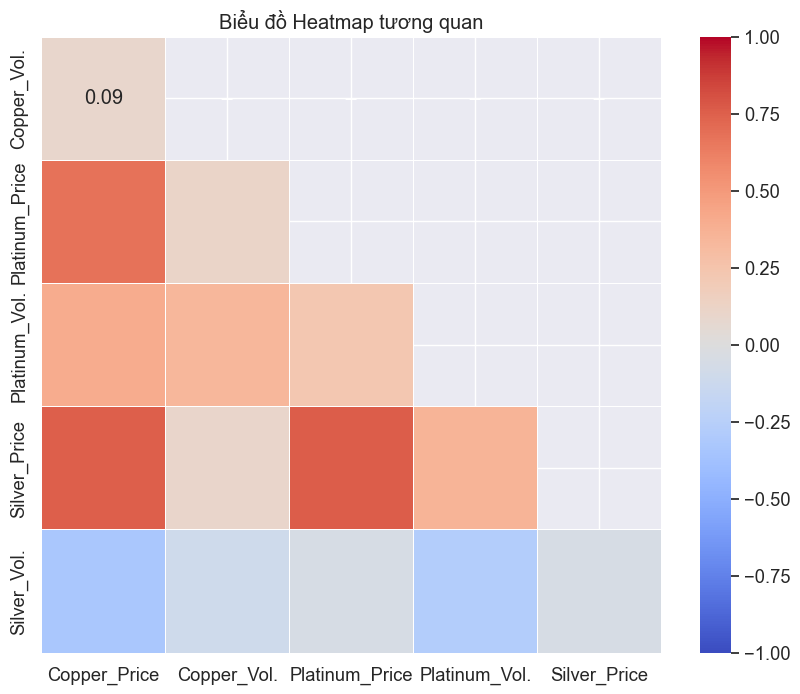

In [71]:
heatmap_corr(df.corr())

In [72]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
name = [x.replace('_Price','') for x in price]


In [73]:
growth_rates = {}

for stock in price:
    start_price = df[stock].iloc[0]
    end_price = df[stock].iloc[-1]
    growth_rate = (end_price - start_price) / start_price * 100
    growth_rates[stock] = growth_rate
df_growth = pd.DataFrame(list(growth_rates.items()), columns=['Stock', 'Growth Rate'])
fig = px.bar(df_growth, x='Growth Rate', y='Stock', orientation='h', labels={'Growth Rate': 'Growth Rate (%)', 'Stock': 'Stock'}, title='Thông kê tốc độ tăng trưởng')
fig.show()

In [74]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

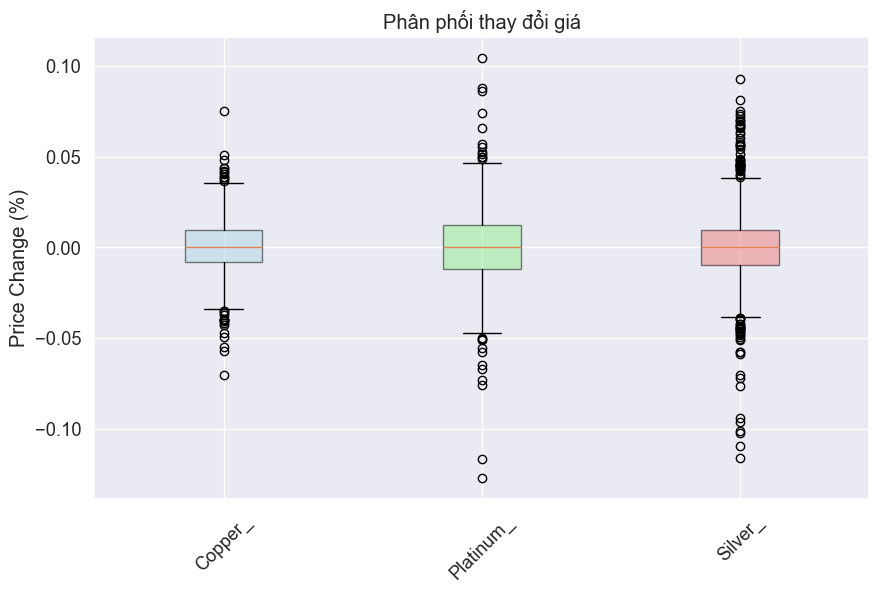

In [75]:
daily_return_array = df[price].pct_change().dropna()

plt.figure(figsize=(10, 6))
box = plt.boxplot(daily_return_array.values, labels=name, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'tan', 'lightpink', 'lightsalmon', 'orange', 'lightyellow', 'lightseagreen', 'lightgray']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color, alpha=0.5)  # Tinh chỉnh màu sắc và độ trong suốt

plt.title('Phân phối thay đổi giá')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)

plt.show()

In [76]:
df_price = df[price]
df_price_new= df_price/df_price.iloc[0]

In [77]:
fig = px.line(data_frame=df_price_new,title='Bảng thông kê giá cả tổng quan')
fig.show()

In [78]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [79]:
mean_daily_return_day = 0
mean_daily_return_year = 0
price_volatility=0
mean_daily_return_array_day = []
mean_daily_return_array_year = []
price_volatility_array =[]
for i in daily_return :
    mean_daily_return_day = df[i].mean()
    mean_daily_return_year=mean_daily_return_day*365
    price_volatility = df[i].std()
    price_volatility_array.append(price_volatility)
    mean_daily_return_array_day.append(mean_daily_return_day)
    mean_daily_return_array_year.append(mean_daily_return_year)
    

Đậy là loại dashboard cơ mà cột không nhất thiết phải dashboard

In [80]:
# data_visual = pd.DataFrame({'Stock': price, 'Price_Volatility': price_volatility_array, 'Year_Return': mean_daily_return_array_year})

# fig = px.histogram(data_frame=data_visual, x='Stock', y='Year_Return',title='Bảng trung bình lợi nhuận hàng năm')
# fig.show()

In [81]:
# fig = px.histogram(data_frame=data_visual, x='Stock', y='Price_Volatility',title='Bảng biến động giá hàng ngày')
# fig.show()

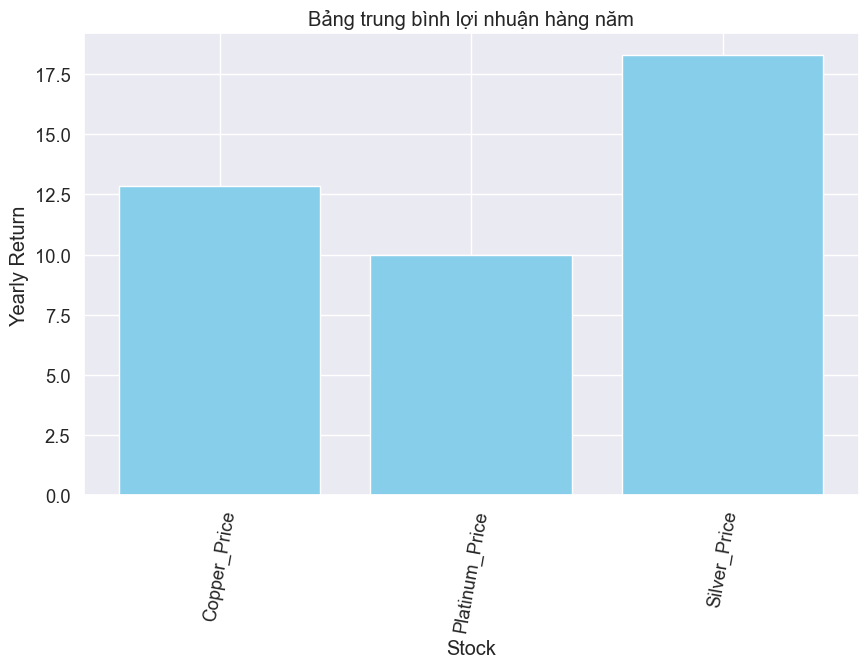

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(price, mean_daily_return_array_year,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng trung bình lợi nhuận hàng năm')
plt.xticks(rotation=80)
plt.show()

Biến động càng thấp càng đáng đầu tư

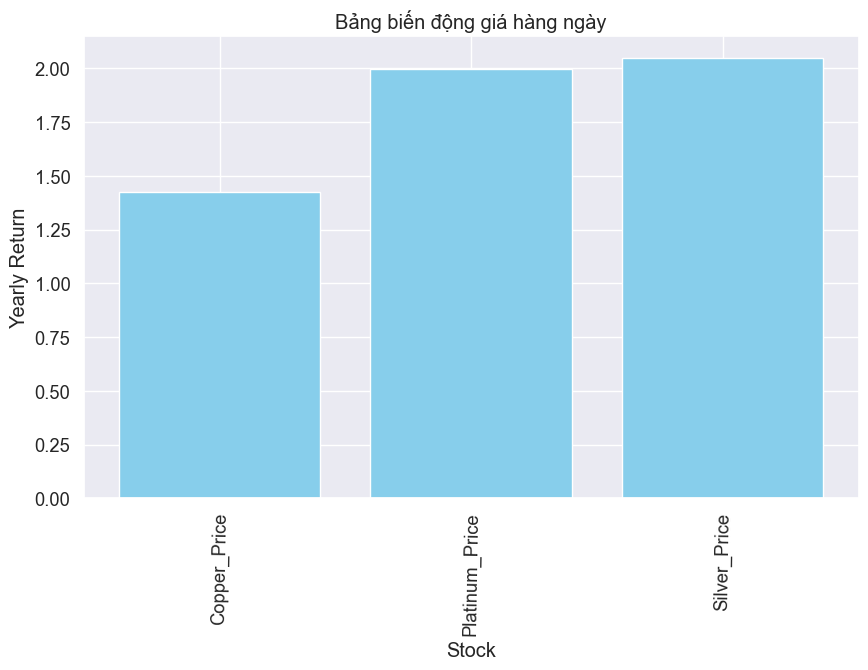

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(price, price_volatility_array,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng biến động giá hàng ngày')
plt.xticks(rotation=89)
plt.show()

In [95]:
df_corr = df_price_new.corr()

In [94]:
high_corr_pairs = {}
for column in df_corr.columns:
    high_corr_columns = df_corr[column][(df_corr[column]) >= 0].index
    for corr_column in high_corr_columns:
        if column != corr_column:
            key = f"{column}/{corr_column}"
            value = df_corr[column][corr_column]
            high_corr_pairs[key] = value

In [86]:
# def remove_duplicate_values(x):
#     unique_dict = {}
#     seen_values = set()
#     for key, value in x.items():
#         if value not in seen_values:
#             unique_dict[key] = value
#             seen_values.add(value)
#     return unique_dict

# high_corr_pairs = remove_duplicate_values(high_corr_pairs)

In [96]:
keys_list = list(high_corr_pairs)

Lưu ý không kiến nghị chạy đoạn code vì đã lưu plot thành ảnh r , nếu chạy bỏ # đi

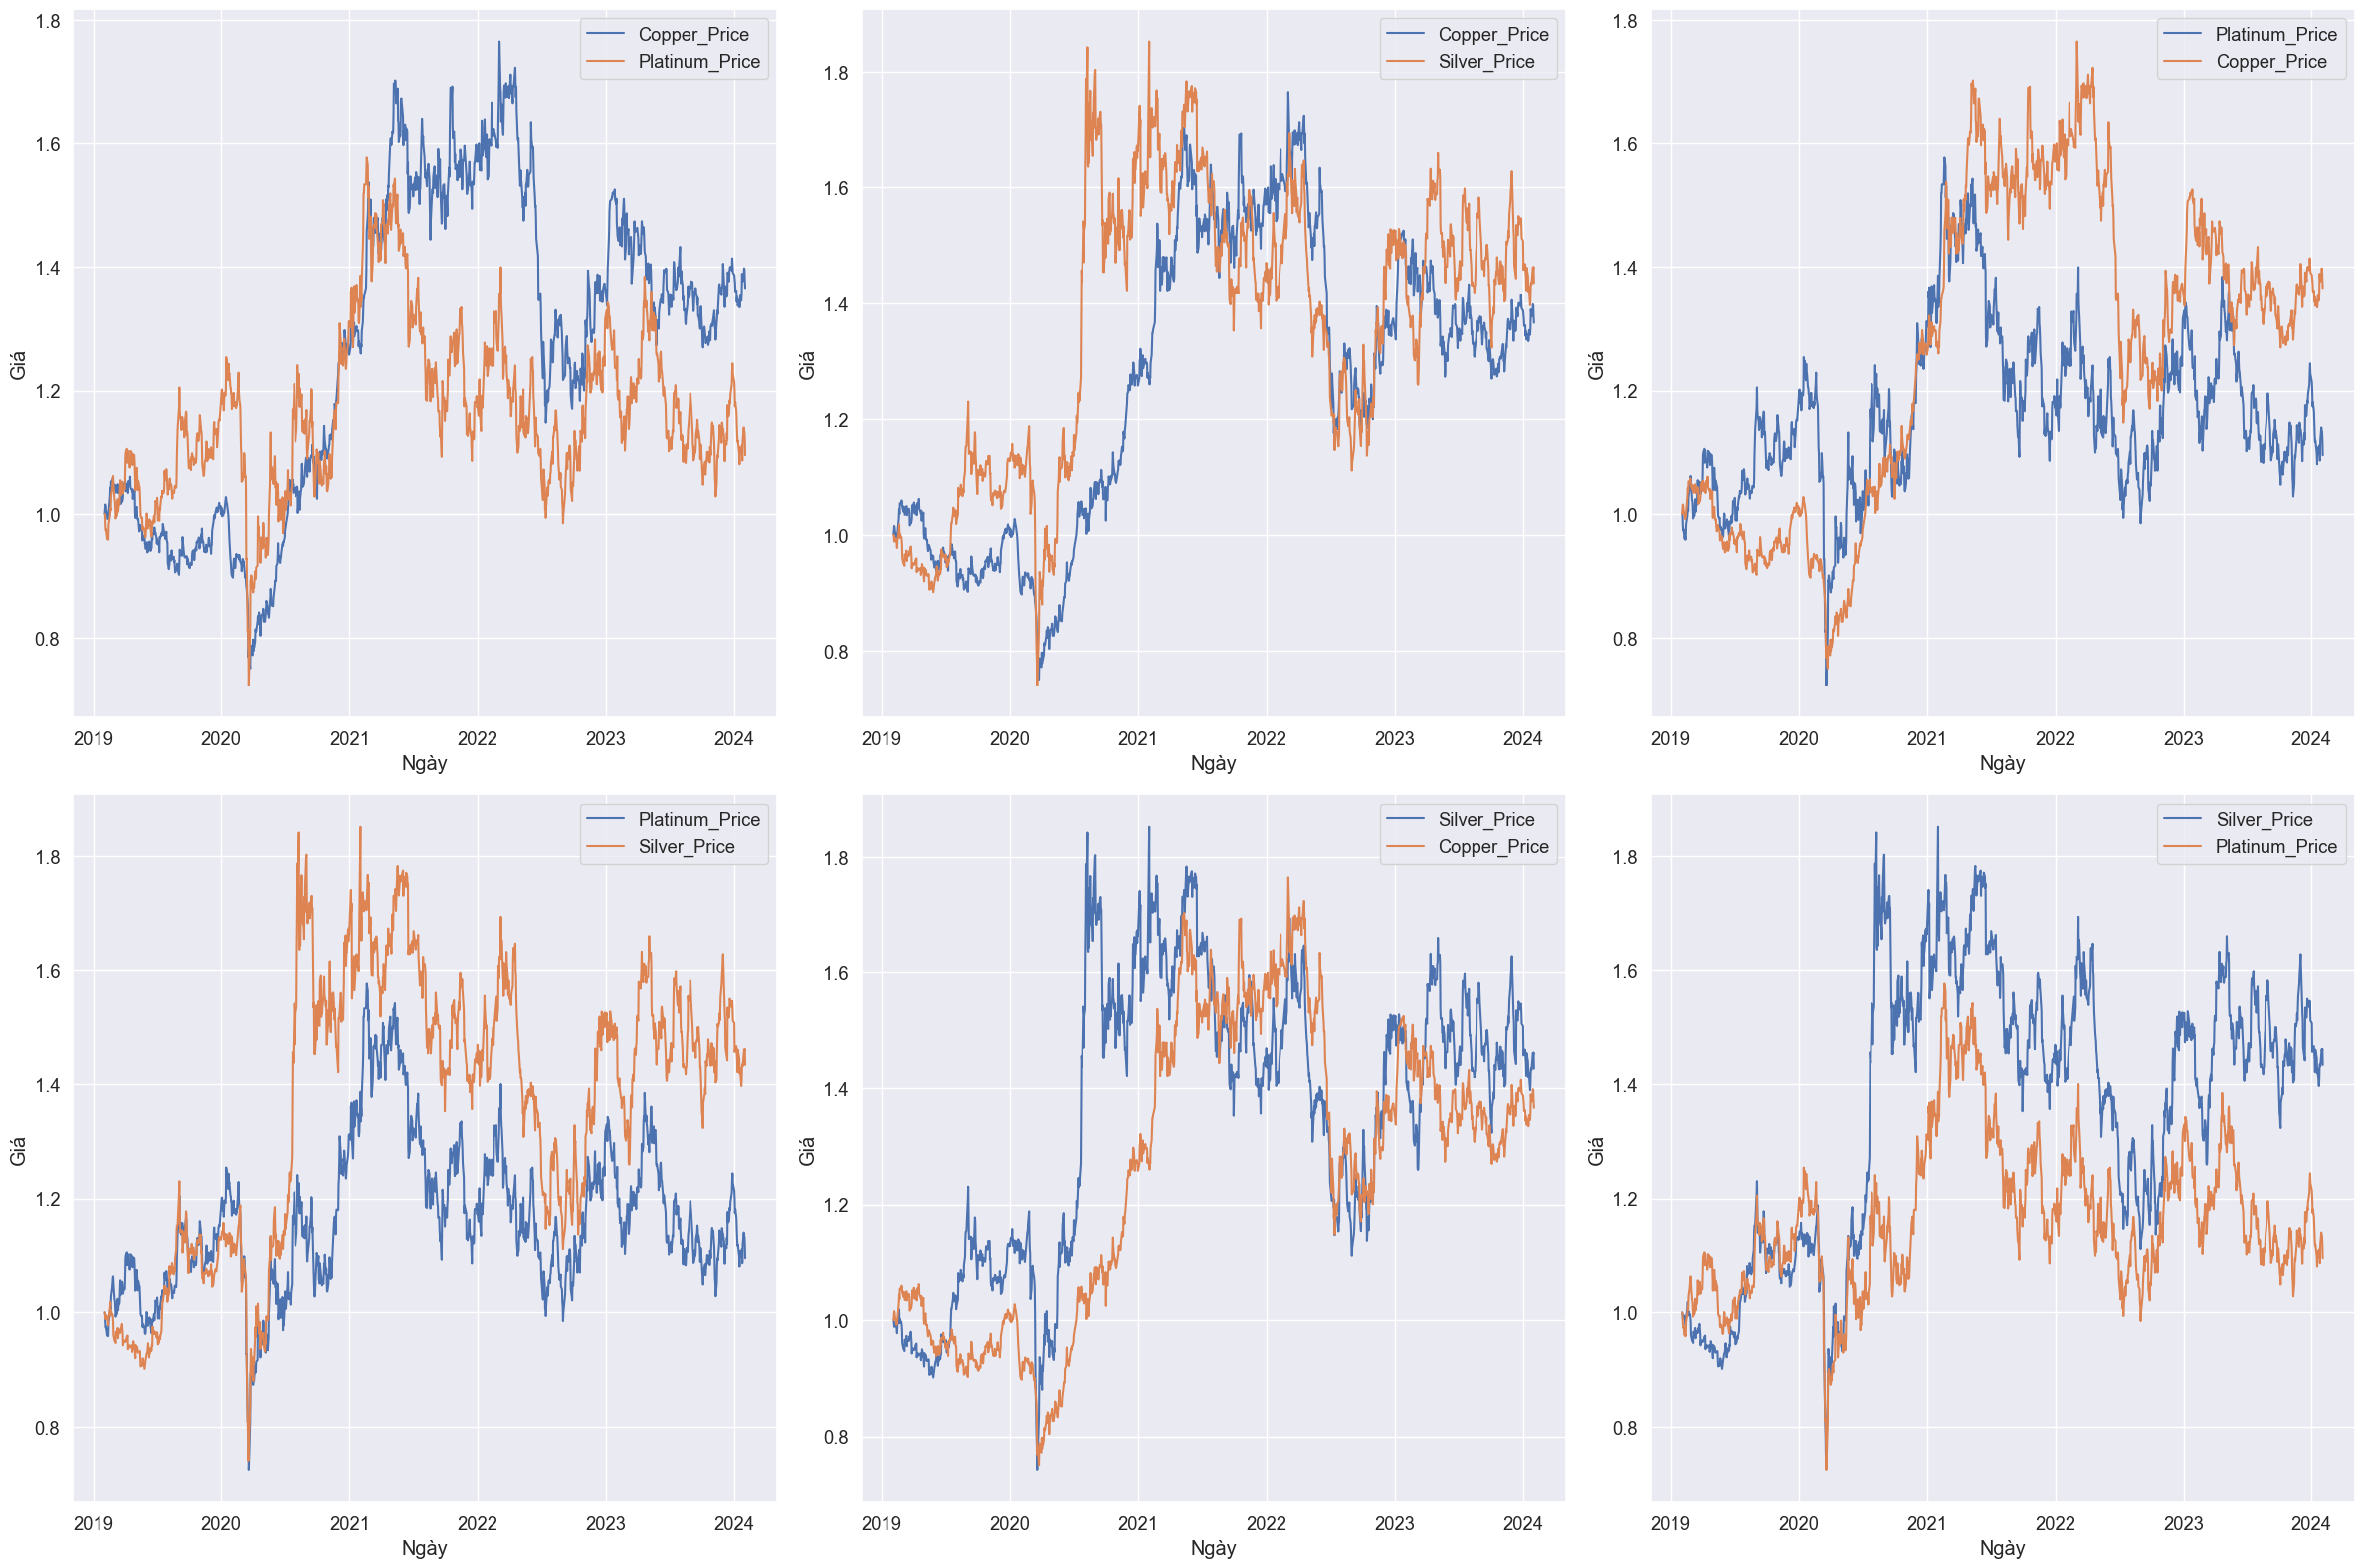

In [97]:

n_cols = 3
n_rows = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(keys_list):
            ax_i = ax[r, c]
            separated_columns = keys_list[i].split('/')
            ax_i.plot(df_price_new.index, df_price_new[separated_columns[0]], label=separated_columns[0])
            ax_i.plot(df_price_new.index, df_price_new[separated_columns[1]], label=separated_columns[1])
            ax_i.set_xlabel('Ngày')
            ax_i.set_ylabel('Giá')
            ax_i.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_volume=df[volume]
df_corr_volume = df_volume.corr()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



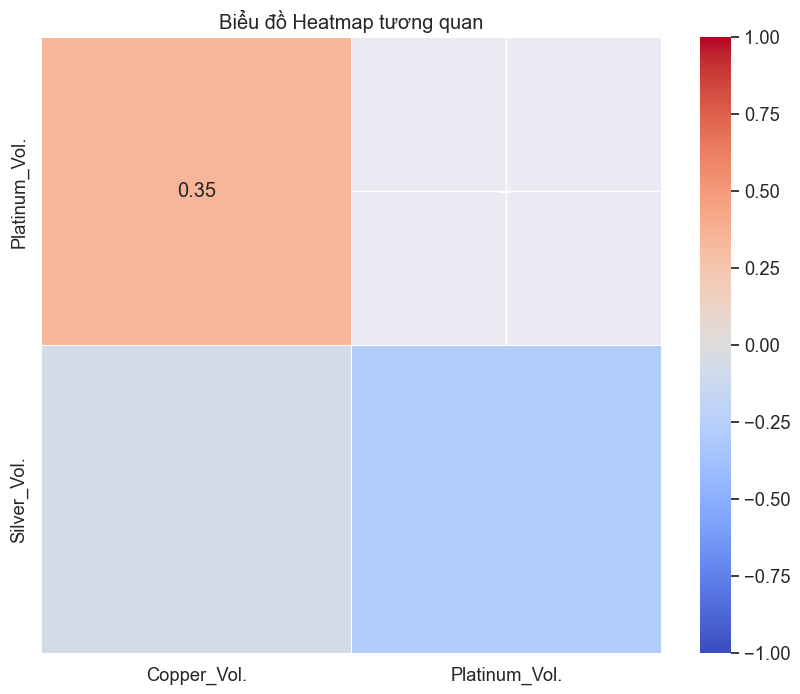

In [ ]:
heatmap_corr(df_corr_volume)

In [ ]:
fig = px.line(data_frame=df_volume,title='Khối lượng giao dịch hàng ngày tổng quát')
fig.show()

In [ ]:
 df_volume_sum = df_volume.sum()
 df_volume_sum = df_volume_sum.reset_index()
 df_volume_sum.columns = ['Stock', 'Sum Volume']
 fig = px.bar(df_volume_sum, y='Stock', x='Sum Volume', title='Tổng khối lượng cổ phiếu của các công ty')
 fig.show()

In [ ]:
 df_volume_mean = df_volume.mean()
 df_volume_mean = df_volume_mean.reset_index()
 df_volume_mean.columns = ['Stock', 'Mean Volume']
 fig = px.bar(df_volume_mean, y='Stock', x='Mean Volume', title='Trung bình khối lượng mua cổ phiếu của các công ty')
 fig.show()


In [ ]:
df_volume_std = df_volume.std()
df_volume_std = df_volume_std.reset_index()
df_volume_std.columns = ['Stock', 'STD Volume']
fig = px.bar(df_volume_std, x='Stock', y='STD Volume', title='Biến động khối lượng cổ phiếu của các công ty')
fig.show()

In [ ]:
df_trading_value = df
columns = df_trading_value.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
stock= [x.replace('Vol.','') for x in volume]

In [ ]:
trading_value = [x + 'Trading_Value' for x in stock]
trading_values_sum={}
for i in stock:
    df_trading_value[i+'Trading_Value'] = df_trading_value[f'{i}Price'] * df_trading_value[f'{i}Vol.']
    trading_values_sum[i] = (df_trading_value[f'{i}Price'] * df_trading_value[f'{i}Vol.']).sum()

In [ ]:
fig = px.line(df_trading_value[trading_value],title="Giá trị giao dịch từng ngày ")
fig.show()

In [ ]:
df_trading_values_sum = pd.DataFrame(list(trading_values_sum.items()), columns=['Stock', 'Total Trading Value'])
fig = px.bar(df_trading_values_sum, x='Stock', y='Total Trading Value', title='Tổng giá trị giao dịch cho từng cổ phiếu' )
fig.show()